In [31]:

import pandas as pd

# 엑셀 파일 불러오기
uv_df = pd.read_csv(r'C:\Users\USER\Documents\withskin_project\uv_summary.csv')

# 데이터 확인
uv_df.head()

,파일명,포피린 비율,피지비율,피지수,피지면적
0,uv_0523_1.png,0.000014,0.000372,12,11113.0
1,uv_0523_10.png,0.000188,0.000416,2,1959.0
2,uv_0523_100.png,0.012682,0.001107,51,23452.0
3,uv_0523_101.png,0.026985,0.000959,28,22649.0
4,uv_0523_102.png,0.000400,0.000039,21,26917.0


In [32]:

import pandas as pd

# 엑셀 파일 불러오기
area_df = pd.read_csv(r'C:\Users\USER\Documents\withskin_project\area.csv')

# 데이터 확인
area_df.head()

,file_name,넓이
0,uv_0523_1.png,1153476
1,uv_0523_10.png,1153476
2,uv_0523_100.png,746496
3,uv_0523_101.png,746496
4,uv_0523_102.png,2490084


In [33]:
import pandas as pd

# 두 데이터프레임을 공통 열 (여기서는 'Key')을 기준으로 합치기
result = pd.merge(uv_df, area_df, left_on='파일명', right_on='file_name')
result

,파일명,포피린 비율,피지비율,피지수,피지면적,file_name,넓이
0,uv_0523_1.png,0.000014,0.000372,12,11113.0,uv_0523_1.png,1153476
1,uv_0523_10.png,0.000188,0.000416,2,1959.0,uv_0523_10.png,1153476
2,uv_0523_100.png,0.012682,0.001107,51,23452.0,uv_0523_100.png,746496
3,uv_0523_101.png,0.026985,0.000959,28,22649.0,uv_0523_101.png,746496
4,uv_0523_102.png,0.000400,0.000039,21,26917.0,uv_0523_102.png,2490084
...,...,...,...,...,...,...,...
324,uv_95.png,0.007548,0.009351,45,58472.0,uv_95.png,1153476
325,uv_96.png,0.013498,0.004417,21,11021.0,uv_96.png,746496
326,uv_97.png,0.004797,0.015143,57,47290.0,uv_97.png,746496
327,uv_98.png,0.003662,0.010635,52,36450.0,uv_98.png,746496


#### 정확한 피지비율 구하기 (피지면적/넓이) 

- 기존 데이터에 존재하는 피지비율 열은 정확도가 피지면적/넓이에 비해 낮음
- 따라서, 피지면적/넓이 계산을 통해 구하기

In [34]:


oil = result['피지면적'] / result['넓이']
result['피지면적/넓이'] = oil

In [35]:
result

,파일명,포피린 비율,피지비율,피지수,피지면적,file_name,넓이,피지면적/넓이
0,uv_0523_1.png,0.000014,0.000372,12,11113.0,uv_0523_1.png,1153476,0.009634
1,uv_0523_10.png,0.000188,0.000416,2,1959.0,uv_0523_10.png,1153476,0.001698
2,uv_0523_100.png,0.012682,0.001107,51,23452.0,uv_0523_100.png,746496,0.031416
3,uv_0523_101.png,0.026985,0.000959,28,22649.0,uv_0523_101.png,746496,0.030340
4,uv_0523_102.png,0.000400,0.000039,21,26917.0,uv_0523_102.png,2490084,0.010810
...,...,...,...,...,...,...,...,...
324,uv_95.png,0.007548,0.009351,45,58472.0,uv_95.png,1153476,0.050692
325,uv_96.png,0.013498,0.004417,21,11021.0,uv_96.png,746496,0.014764
326,uv_97.png,0.004797,0.015143,57,47290.0,uv_97.png,746496,0.063349
327,uv_98.png,0.003662,0.010635,52,36450.0,uv_98.png,746496,0.048828


In [36]:
# 열의 평균 계산
mean_value = result['피지면적/넓이'].mean()

# 열의 최솟값 계산
min_value = result['피지면적/넓이'].min()

# 열의 최댓값 계산
max_value = result['피지면적/넓이'].max()

# 열의 사분위수 계산
quantiles = result['피지면적/넓이'].quantile([0.25, 0.5, 0.75, 0.01])

print("Mean:", mean_value)
print("Minimum:", min_value)
print("Maximum:", max_value)
print("25th Percentile:", quantiles[0.25])
print("50th Percentile (Median):", quantiles[0.5])
print("75th Percentile (Median):", quantiles[0.75])

Mean: 0.025147513935308466
Minimum: 0.0
Maximum: 0.07346673399823254
25th Percentile: 0.014162165637860082
50th Percentile (Median): 0.023014770862264864
75th Percentile (Median): 0.03345789673021083


In [37]:
# 열의 평균 계산
mean_value = result['피지수'].mean()

# 열의 최솟값 계산
min_value = result['피지수'].min()

# 열의 최댓값 계산
max_value = result['피지수'].max()

# 열의 사분위수 계산
quantiles = result['피지수'].quantile([0.25, 0.5, 0.75, 0.01])

print("Mean:", mean_value)
print("Minimum:", min_value)
print("Maximum:", max_value)
print("25th Percentile:", quantiles[0.25])
print("50th Percentile (Median):", quantiles[0.5])
print("75th Percentile (Median):", quantiles[0.75])

Mean: 28.78115501519757
Minimum: 0
Maximum: 75
25th Percentile: 17.0
50th Percentile (Median): 29.0
75th Percentile (Median): 38.0


- 피지면적/넓이 minimum : 0
- 피지수 minimum : 0

In [38]:
import pandas as pd

# DataFrame에서 특정 컬럼 선택
column_name = '피지면적/넓이'  # 점수화할 컬럼의 이름
selected_column = result[column_name]

# 점수 계산
scores = (1 - selected_column)

# 스케일링된 결과를 원본 DataFrame에 반영
result[column_name] = scores

# 결과 출력
result

,파일명,포피린 비율,피지비율,피지수,피지면적,file_name,넓이,피지면적/넓이
0,uv_0523_1.png,0.000014,0.000372,12,11113.0,uv_0523_1.png,1153476,0.990366
1,uv_0523_10.png,0.000188,0.000416,2,1959.0,uv_0523_10.png,1153476,0.998302
2,uv_0523_100.png,0.012682,0.001107,51,23452.0,uv_0523_100.png,746496,0.968584
3,uv_0523_101.png,0.026985,0.000959,28,22649.0,uv_0523_101.png,746496,0.969660
4,uv_0523_102.png,0.000400,0.000039,21,26917.0,uv_0523_102.png,2490084,0.989190
...,...,...,...,...,...,...,...,...
324,uv_95.png,0.007548,0.009351,45,58472.0,uv_95.png,1153476,0.949308
325,uv_96.png,0.013498,0.004417,21,11021.0,uv_96.png,746496,0.985236
326,uv_97.png,0.004797,0.015143,57,47290.0,uv_97.png,746496,0.936651
327,uv_98.png,0.003662,0.010635,52,36450.0,uv_98.png,746496,0.951172


### 피지면적/넓이 - 기본 통계 확인

In [39]:
# 열의 평균 계산
mean_value = result['피지면적/넓이'].mean()

# 열의 최솟값 계산
min_value = result['피지면적/넓이'].min()

# 열의 최댓값 계산
max_value = result['피지면적/넓이'].max()

# 열의 사분위수 계산
quantiles = result['피지면적/넓이'].quantile([0.25, 0.5, 0.75, 0.01])

print("Mean:", mean_value)
print("Minimum:", min_value)
print("Maximum:", max_value)
print("25th Percentile:", quantiles[0.25])
print("50th Percentile (Median):", quantiles[0.5])
print("75th Percentile (Median):", quantiles[0.75])


Mean: 0.9748524860646911
Minimum: 0.9265332660017674
Maximum: 1.0
25th Percentile: 0.9665421032697892
50th Percentile (Median): 0.9769852291377351
75th Percentile (Median): 0.9858378343621399


#### 시각화

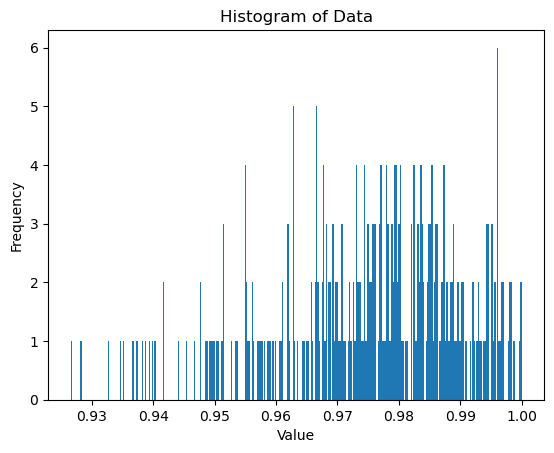

In [40]:
import matplotlib.pyplot as plt

data = result['피지면적/넓이']  # 데이터 리스트
num_bins = len(data)

plt.hist(data, bins=num_bins)  # 데이터를 10개의 구간으로 나누어 히스토그램을 그립니다.
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.title('Histogram of Data')  # 그래프 제목 설정

plt.show()

#### 4분위를 기준으로 점수화

In [41]:
# 4분위로 4가지 구간별 점수화


def calculate_score(value):
    # Percentiles
    p25 = 0.9665421032697892
    p50 = 0.9769852291377351
    p75 = 0.9858378343621399
    
    # Score ranges
    if value <= p25:
        return 1 + (value - 0) / (p25 - 0) * 24
    elif p25 < value <= p50:
        return 26 + (value - p25) / (p50 - p25) * 24
    elif p50 < value <= p75:
        return 51 + (value - p50) / (p75 - p50) * 24
    else:
        return 76 + (value - p75) / (1 - p75) * 24

# 주어진 값에 대한 점수를 계산
value = 0.98583 # 예시값
score = calculate_score(value)
print("Score:",score)

rounded_value = round(score) # 첫째 자리에서 반올림
print("반올림한 점수:",rounded_value)

result['피지면적/넓이 점수'] = result['피지면적/넓이'].apply(lambda x: calculate_score(x))


Score: 74.97876052454711
반올림한 점수: 75


In [42]:
result['피지면적/넓이 점수'] = result['피지면적/넓이'].apply(lambda x: calculate_score(x))
result

,파일명,포피린 비율,피지비율,피지수,피지면적,file_name,넓이,피지면적/넓이,피지면적/넓이 점수
0,uv_0523_1.png,0.000014,0.000372,12,11113.0,uv_0523_1.png,1153476,0.990366,83.673078
1,uv_0523_10.png,0.000188,0.000416,2,1959.0,uv_0523_10.png,1153476,0.998302,97.121890
2,uv_0523_100.png,0.012682,0.001107,51,23452.0,uv_0523_100.png,746496,0.968584,30.692359
3,uv_0523_101.png,0.026985,0.000959,28,22649.0,uv_0523_101.png,746496,0.969660,33.164475
4,uv_0523_102.png,0.000400,0.000039,21,26917.0,uv_0523_102.png,2490084,0.989190,81.681318
...,...,...,...,...,...,...,...,...,...
324,uv_95.png,0.007548,0.009351,45,58472.0,uv_95.png,1153476,0.949308,24.572064
325,uv_96.png,0.013498,0.004417,21,11021.0,uv_96.png,746496,0.985236,73.369357
326,uv_97.png,0.004797,0.015143,57,47290.0,uv_97.png,746496,0.936651,24.257773
327,uv_98.png,0.003662,0.010635,52,36450.0,uv_98.png,746496,0.951172,24.618345


### 피지수 > 점수화

In [43]:
import pandas as pd

# 피지 수를 점수로 환산하는 함수 정의
def convert_sebum_to_score(sebum_count, minimum, maximum):
    score = round(((maximum - sebum_count) / (maximum - minimum)) * 100)
    return score

# 예시 데이터프레임 (임의로 피지 수 열의 값을 등록했습니다)
data = {'피지 수': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
sebum_df = pd.DataFrame(data)

# 정의된 범위 값
# 피지 최대갯수: 75 (그 이상일 경우가 있을 수 있으므로 최댓값을 100개로 기준한다.)
minimum = 0
maximum = 100

# 피지 수 데이터를 점수로 환산하여 새로운 열 '점수'에 추가합니다.
result['피지수 점수'] = result['피지수'].apply(lambda x: convert_sebum_to_score(x, minimum, maximum))

In [44]:
result

,파일명,포피린 비율,피지비율,피지수,피지면적,file_name,넓이,피지면적/넓이,피지면적/넓이 점수,피지수 점수
0,uv_0523_1.png,0.000014,0.000372,12,11113.0,uv_0523_1.png,1153476,0.990366,83.673078,88
1,uv_0523_10.png,0.000188,0.000416,2,1959.0,uv_0523_10.png,1153476,0.998302,97.121890,98
2,uv_0523_100.png,0.012682,0.001107,51,23452.0,uv_0523_100.png,746496,0.968584,30.692359,49
3,uv_0523_101.png,0.026985,0.000959,28,22649.0,uv_0523_101.png,746496,0.969660,33.164475,72
4,uv_0523_102.png,0.000400,0.000039,21,26917.0,uv_0523_102.png,2490084,0.989190,81.681318,79
...,...,...,...,...,...,...,...,...,...,...
324,uv_95.png,0.007548,0.009351,45,58472.0,uv_95.png,1153476,0.949308,24.572064,55
325,uv_96.png,0.013498,0.004417,21,11021.0,uv_96.png,746496,0.985236,73.369357,79
326,uv_97.png,0.004797,0.015143,57,47290.0,uv_97.png,746496,0.936651,24.257773,43
327,uv_98.png,0.003662,0.010635,52,36450.0,uv_98.png,746496,0.951172,24.618345,48
